<a href="https://colab.research.google.com/github/EuiHanJung/DataBeginner/blob/main/Chapter2_Tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장 텐서플로우

Tensorflow 버전 : Optimizers 기능을 사용한 예시 (1) - SGD + Momentum

x, y 데이터 세트가 있을 때, 이차 방정식 y = w1x^2 + w2x + b를 만족하는

parameter w1, w2, b를 추정한다.


In [1]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

In [2]:
# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

In [4]:
# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다.
opt = optimizers.SGD(learning_rate = 0.01, momentum = 0.7, nesterov = False)
opt

In [5]:
histLoss = []
for epoch in range(300):
    with tf.GradientTape() as tape:
        # root mean squared error
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1 * x * x + w2 * x + b - y)))
        
    # loss에 대한 각 variable들의 미분값을 계산한다.
    grads = tape.gradient(loss, var_list)
    
    # variable들을 업데이트한다 (Gradient descent)
    opt.apply_gradients(zip(grads, var_list))
    
    if epoch % 10 == 0:
        histLoss.append(loss.numpy())
        print("epoch = %d, loss = %.4f" % (epoch, loss.numpy()))

epoch = 0, loss = 15.3396
epoch = 10, loss = 5.6257
epoch = 20, loss = 3.4174
epoch = 30, loss = 2.4758
epoch = 40, loss = 2.2360
epoch = 50, loss = 2.0873
epoch = 60, loss = 1.9398
epoch = 70, loss = 1.7923
epoch = 80, loss = 1.6448
epoch = 90, loss = 1.4973
epoch = 100, loss = 1.3498
epoch = 110, loss = 1.2023
epoch = 120, loss = 1.0548
epoch = 130, loss = 0.9073
epoch = 140, loss = 0.7598
epoch = 150, loss = 0.6123
epoch = 160, loss = 0.4648
epoch = 170, loss = 0.3174
epoch = 180, loss = 0.5601
epoch = 190, loss = 0.1542
epoch = 200, loss = 0.0578
epoch = 210, loss = 1.5216
epoch = 220, loss = 0.8301
epoch = 230, loss = 0.3389
epoch = 240, loss = 0.6679
epoch = 250, loss = 2.4062
epoch = 260, loss = 0.0390
epoch = 270, loss = 1.4391
epoch = 280, loss = 0.8322
epoch = 290, loss = 0.3389


In [6]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())


추정 결과 :
w1 = 1.94
w2 = 3.00
b = 5.00
final loss = 1.3370


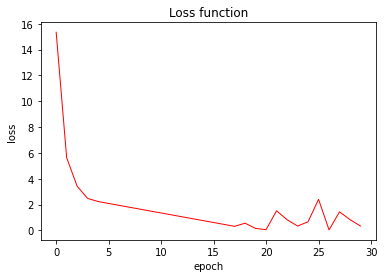

In [7]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()